# Simple Linear Regression

We used the correlation function to measure the strength of the linear relationship between two variables. For most applications, knowing that such a linear relationship exists isn’t enough. We’ll want to be able to understand the nature of the relationship. This is where we’ll use simple linear regression.


## The Model

$$y_i = \beta x_i + \alpha + \epsilon_i$$


where 

- $y_i$ is the number of minutes user i spends on the site daily, 
- $x_i$ is the number of friends user i has
- $\alpha$ is the constant when x = 0.
- $ε_i$ is a (hopefully small) error term representing the fact that there are other factors not accounted for by this simple model.

# Least Squares Fit

最小二乘法

$$ y_i = X_i^T w$$

The constant could be represent by 1 in X

The squared error could be written as: 

$$ \sum_{i = 1}^m (y_i -X_i^T w)^2 $$

If we know $\alpha$ and $\beta$, then we can make predictions.

Since we know the actual output $y_i$ we can compute the error for each pair.

Since the negative errors cancel out with the positive ones, we use squared errors.

The least squares solution is to choose the $\alpha$ and $\beta$ that make **sum_of_squared_errors** as small as possible.

The choice of beta means that when the input value increases by standard_deviation(x), the prediction increases by correlation(x, y) * standard_deviation(y). 

- In the case when x and y are perfectly positively correlated, a one standard deviation increase in x results in a one-standard-deviation-of-y increase in the prediction.
- When they’re perfectly negatively correlated, the increase in x results in a decrease in the prediction. 
- And when the correlation is zero, beta is zero, which means that changes in x don’t affect the prediction at all.

> In this case, the slope of the fitted line is equal to the correlation between y and x corrected by the ratio of standard deviations of these variables. 

$$ y_i = \alpha + \beta x_i + \varepsilon_i $$

$$ \hat\varepsilon_i =y_i-a -b x_i $$

$$ \text{Find }\min_{a,\, b} Q(a, b), \quad \text{for } Q(a, b) = \sum_{i=1}^n\hat\varepsilon_i^{\,2} = \sum_{i=1}^n (y_i -a - b x_i)^2\ $$


By expanding to get a quadratic expression in $a$ and $b$, we can derive values of $a$ and $b$ that minimize the objective function $Q$ (these minimizing values are denoted $\hat{\alpha}$ and $\hat{\beta}$):



\begin{align}
 \hat\alpha & = \bar{y} - \hat\beta\,\bar{x}, \\
  \hat\beta &= \frac{ \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i=1}^n (x_i - \bar{x})^2 } = \frac{ \operatorname{Cov}(x, y) }{ \operatorname{Var}(x) } = r_{xy} \frac{s_y}{s_x}. \\[6pt]
\end{align}

- $r_{xy}$ as the sample correlation coefficient between x and y
- $s_x$ and $s_y$ as the uncorrected sample standard deviations of x and y


> Kenney, J. F. and Keeping, E. S. (1962) "Linear Regression and Correlation." Ch. 15 in ''Mathematics of Statistics'', Pt. 1, 3rd ed. Princeton, NJ: Van Nostrand, pp. 252–285

Substituting the above expressions for $\hat{\alpha}$ and $\hat{\beta}$ into

$$f = \hat{\alpha} + \hat{\beta} x,$$

yields

$$\frac{ f - \bar{y}}{s_y} = r_{xy} \frac{ x - \bar{x}}{s_x}  .$$


> Kenney, J. F. and Keeping, E. S. (1962) "Linear Regression and Correlation." Ch. 15 in ''Mathematics of Statistics'', Pt. 1, 3rd ed. Princeton, NJ: Van Nostrand, pp. 252–285

In [2]:
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
alpha, beta = 22.9475, 0.90386


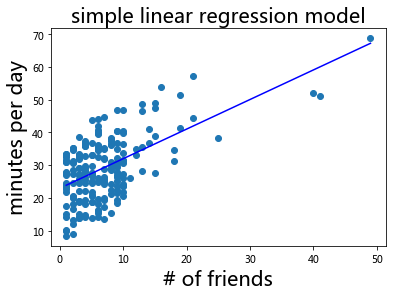

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(num_friends_good, daily_minutes_good)
plt.plot(num_friends_good, [alpha + beta*i for i in num_friends_good], 'b-')
plt.xlabel('# of friends', fontsize = 20)
plt.ylabel('minutes per day', fontsize = 20)
plt.title('simple linear regression model', fontsize = 20)
plt.show()

Of course, we need a better way to figure out how well we’ve fit the data than staring at the graph. 

A common measure is the coefficient of determination (or R-squared), which measures the fraction of the total variation in the dependent variable that is captured by the model.

# Multiple Regression using Matrix Method

Machine Learning in Action

https://github.com/computational-class/machinelearninginaction/

$$ y_i = X_i^T w$$

The constant could be represent by 1 in X

The squared error could be written as: 

$$ \sum_{i = 1}^m (y_i -X_i^T w)^2 $$

We can also write this in matrix notation as $(y-Xw)^T(y-Xw)$. 

If we take the derivative of this with respect to w, we’ll get $X^T(y-Xw)$. 

We can set this to zero and solve for w to get the following equation:

$$\hat w = (X^T X)^{-1}X^T y$$

In [16]:
# https://github.com/computational-class/machinelearninginaction/blob/master/Ch08/regression.py
import pandas as pd
import random

dat = pd.read_csv('../data/ex0.txt', sep = '\t', names = ['x1', 'x2', 'y'])
dat['x3'] = [yi*.3 + .5*random.random() for yi in dat['y']]
dat.head()

,x1,x2,y,x3
0,1.0,0.067732,3.176513,1.384291
1,1.0,0.427810,3.816464,1.354246
2,1.0,0.995731,4.550095,1.801504
3,1.0,0.738336,4.256571,1.374716
4,1.0,0.981083,4.560815,1.637240


In [17]:
from numpy import mat, linalg, corrcoef

def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [18]:
xs = [[dat.x1[i], dat.x2[i], dat.x3[i]] for i in dat.index]
y = dat.y
print(xs[:2])
ws = standRegres(xs, y)
print(ws)

[[1.0, 0.067732, 1.3842912829135907], [1.0, 0.42781, 1.3542457458385966]]
[[2.88936235]
 [1.63851705]
 [0.10238664]]


In [14]:
xMat=mat(xs)
yMat=mat(y)
yHat = xMat*ws

xCopy=xMat.copy()
xCopy.sort(0)
yHat=xCopy*ws

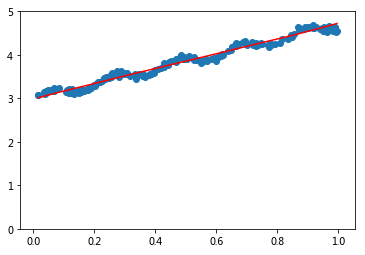

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])
ax.plot(xCopy[:,1],yHat, 'r-')
plt.ylim(0, 5)
plt.show()

In [108]:
yHat = xMat*ws
corrcoef(yHat.T, yMat)

array([[ 1.        ,  0.98666465],
       [ 0.98666465,  1.        ]])

# Doing Statistics with statsmodels

http://www.statsmodels.org/stable/index.html

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [109]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [121]:
dat = pd.read_csv('ex0.txt', sep = '\t', names = ['x1', 'x2', 'y'])
dat['x3'] = [yi*.3 - .1*random.random() for yi in y]
dat.head()

,x1,x2,y,x3
0,1.0,0.067732,3.176513,0.885553
1,1.0,0.427810,3.816464,1.100010
2,1.0,0.995731,4.550095,1.323654
3,1.0,0.738336,4.256571,1.267457
4,1.0,0.981083,4.560815,1.300163


In [123]:
results = smf.ols('y ~ x2 + x3', data=dat).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7167.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):          1.04e-184
Time:                        13:42:03   Log-Likelihood:                 284.06
No. Observations:                 200   AIC:                            -562.1
Df Residuals:                     197   BIC:                            -552.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7146      0.093     18.372      0.000       1.531       1.899
x2             0.9264      0.057     16.228      0.000       0.814       1.039
x3             1.5151      0.109     13.909      0.000       1.300       1.730
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                2.762
Skew:                          -0.112   Prob(JB):                        0.251
Kurtosis:                       2.469   Cond. No.                         58.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

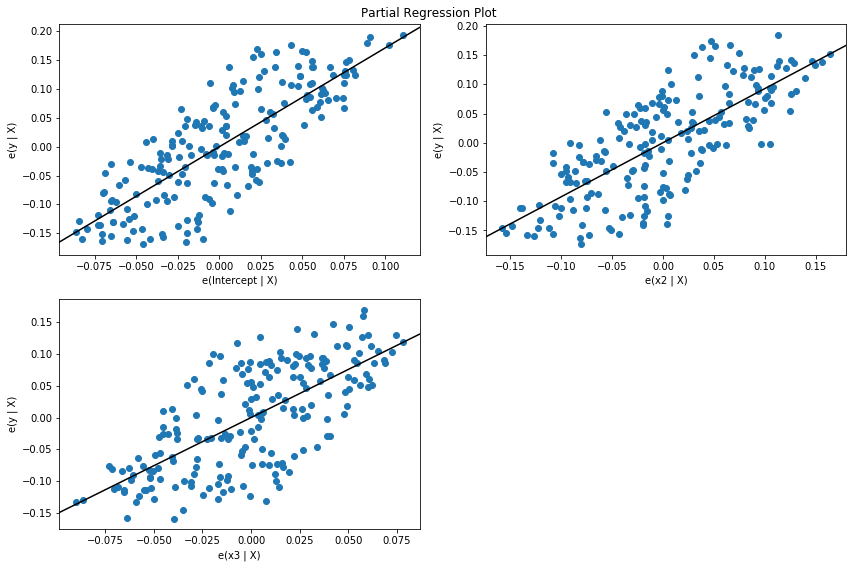

In [124]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig = fig)
plt.show()

In [135]:
import numpy as np
X = np.array(num_friends_good)
X = sm.add_constant(X, prepend=False)

mod = sm.OLS(daily_minutes_good, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     98.60
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.68e-19
Time:                        13:58:41   Log-Likelihood:                -711.76
No. Observations:                 203   AIC:                             1428.
Df Residuals:                     201   BIC:                             1434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9039      0.091      9.930      0.0

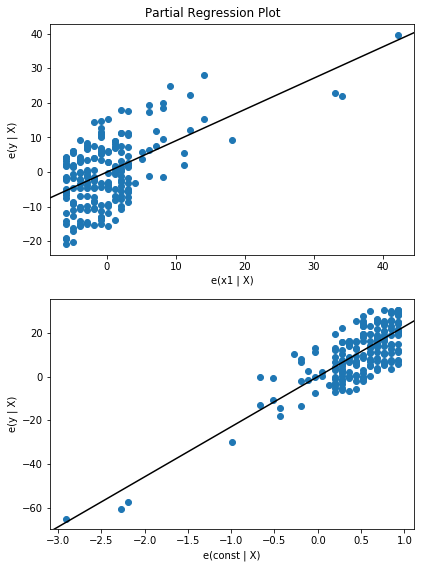

In [137]:
fig = plt.figure(figsize=(6,8))
fig = sm.graphics.plot_partregress_grid(res, fig = fig)
plt.show()